In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [5]:
print(len(x_Train))
print(len(x_Test))

60000
10000


In [6]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype("float32")
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype("float32")

In [7]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [23]:
# build CNN model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

# first cov and pooling
model.add(Conv2D(filters=16, kernel_size=(5,5), padding="same", input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# second cov and pooling

model.add(Conv2D(filters=36, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

In [25]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x=x_Train4D_normalize, 
                          y=y_TrainOneHot, validation_split=0.2, 
                          epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 31s - loss: 0.4829 - acc: 0.8506 - val_loss: 0.0939 - val_acc: 0.9708
Epoch 2/10
 - 31s - loss: 0.1284 - acc: 0.9619 - val_loss: 0.0604 - val_acc: 0.9810
Epoch 3/10
 - 31s - loss: 0.0987 - acc: 0.9711 - val_loss: 0.0492 - val_acc: 0.9850
Epoch 4/10
 - 30s - loss: 0.0755 - acc: 0.9773 - val_loss: 0.0434 - val_acc: 0.9868
Epoch 5/10
 - 30s - loss: 0.0658 - acc: 0.9797 - val_loss: 0.0437 - val_acc: 0.9874
Epoch 6/10
 - 30s - loss: 0.0570 - acc: 0.9833 - val_loss: 0.0360 - val_acc: 0.9892
Epoch 7/10
 - 30s - loss: 0.0521 - acc: 0.9842 - val_loss: 0.0367 - val_acc: 0.9886
Epoch 8/10
 - 30s - loss: 0.0463 - acc: 0.9857 - val_loss: 0.0340 - val_acc: 0.9902
Epoch 9/10
 - 30s - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0335 - val_acc: 0.9908
Epoch 10/10
 - 30s - loss: 0.0396 - acc: 0.9881 - val_loss: 0.0323 - val_acc: 0.9905


In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

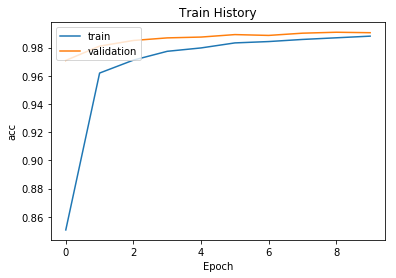

In [31]:
show_train_history(train_history, "acc", "val_acc")

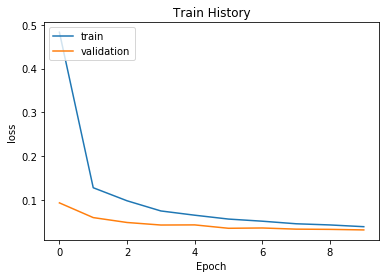

In [32]:
show_train_history(train_history, "loss", "val_loss")

In [34]:
# evaluation

scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 247us/step


0.99209999999999998

In [35]:
# predict

prediction = model.predict_classes(x_Test4D_normalize)

10000/10000 [==============================] - 2s 242us/step


In [36]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [37]:
import matplotlib.pyplot as plt
def plot_images_labels_predition(images, labels, prediction, index, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[index], cmap="binary")
        title = "label = " + str(labels[index])
        if len(prediction) > 0:
            title += " predict = " + str(prediction[index])
        
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

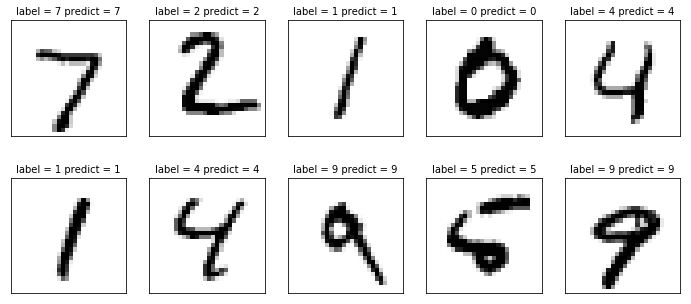

In [38]:
plot_images_labels_predition(x_Test, y_Test, prediction, index=0)

In [40]:
import pandas as pd

pd.crosstab(y_Test, prediction, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1132,1,1,0,0,0,1,0,0
2,3,2,1022,0,0,0,0,4,1,0
3,0,0,0,1004,0,3,0,0,3,0
4,0,0,0,0,975,0,0,0,0,7
5,1,0,0,4,0,883,2,0,0,2
6,3,2,1,0,2,1,948,0,1,0
7,0,2,3,3,0,0,0,1016,1,3
8,1,1,2,0,0,1,0,2,963,4
